In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from datetime import date

In [2]:
df = pd.read_csv('C:\\Users\\amitf\\Desktop\\amit\\Self practice\\data for analysis\\outbreaks\\outbreaks.csv', encoding='ISO-8859-1')
df = df.copy()
df.tail()

,Year,Month,State,Location,Food,Ingredient,Species,Serotype/Genotype,Status,Illnesses,Hospitalizations,Fatalities
19114,2015,December,Wisconsin,Restaurant,NaN,NaN,Norovirus genogroup II,GII_14,Confirmed,4,0.0,0.0
19115,2015,December,Wisconsin,Private Home/Residence,Salsa,NaN,Norovirus genogroup II,GII_2,Confirmed,16,0.0,0.0
19116,2015,December,Wisconsin,Nursing Home/Assisted Living Facility,NaN,NaN,Norovirus genogroup II,GII_17 Kawasaki (2014),Confirmed,43,3.0,0.0
19117,2015,December,Wisconsin,Fast Food Restaurant,NaN,NaN,Norovirus genogroup II,GII_2,Confirmed,5,0.0,0.0
19118,2015,December,Wyoming,NaN,NaN,NaN,NaN,NaN,NaN,3,0.0,0.0


In [43]:
df.columns

Index(['Year', 'Month', 'State', 'Location', 'Food', 'Ingredient', 'Species',
       'Serotype/Genotype', 'Status', 'Illnesses', 'Hospitalizations',
       'Fatalities'],
      dtype='object')

In [3]:
df.shape

(19119, 12)

# **EDA PROJECT**
<ul>
<li>missing values</li>
<li>outliers</li>
<li>EDA</li>
</ul>

In [4]:
df.dtypes

Year                   int64
Month                 object
State                 object
Location              object
Food                  object
Ingredient            object
Species               object
Serotype/Genotype     object
Status                object
Illnesses              int64
Hospitalizations     float64
Fatalities           float64
dtype: object

In [5]:
df.isnull().sum().sort_values()

Year                     0
Month                    0
State                    0
Illnesses                0
Location              2166
Fatalities            3601
Hospitalizations      3625
Species               6619
Status                6619
Food                  8963
Serotype/Genotype    15212
Ingredient           17243
dtype: int64

### Function in use

In [6]:
#הדפסת עמודות עם המון ערכים ריקים
def columns_with_empty_values_above_threshold(df, threshold):
    columns_with_empty = []
    for column in df.columns:
        empty_count = df[column].isnull().sum()
        if empty_count > threshold:
            columns_with_empty.append(column)
    return columns_with_empty

#הדפסת מספר שורות עם המון ערכים ריקים
def count_rows_with_empty_values(df, threshold):
    num_empty_values = df.isnull().sum(axis=1)
    rows_with_empty_values = (num_empty_values > threshold).sum()
    return rows_with_empty_values

# הסרת ערכים ריקים מעמודות ממספר מסויים ומטה 
def remove_rows_with_empty_values_below_threshold(df, column_name, threshold):
    df_cleaned = df[df[column_name].isnull().sum() >= threshold]
    return df_cleaned


# **--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

In [7]:
empty_columns = columns_with_empty_values_above_threshold(df, 10000)
print("Columns with empty values:", empty_columns)

Columns with empty values: ['Ingredient', 'Serotype/Genotype']


In [8]:
rows_with_empty = count_rows_with_empty_values(df, threshold=3)
print(f"Number of rows with more than 3 empty values: {rows_with_empty}")

Number of rows with more than 3 empty values: 8172


In [9]:
rows_with_empty = count_rows_with_empty_values(df, threshold=4)
print(f"Number of rows with more than 3 empty values: {rows_with_empty}")

Number of rows with more than 3 empty values: 5360


In [10]:
df_cleaned = df.drop(columns=empty_columns)

In [11]:
df_cleaned.isnull().sum().sort_values()

Year                   0
Month                  0
State                  0
Illnesses              0
Location            2166
Fatalities          3601
Hospitalizations    3625
Species             6619
Status              6619
Food                8963
dtype: int64

In [12]:
rows_with_empty = count_rows_with_empty_values(df_cleaned, threshold=3)
print(f"Number of rows with more than 3 empty values: {rows_with_empty}")

Number of rows with more than 3 empty values: 2274


In [13]:
df_cleaned = df_cleaned[df_cleaned.isnull().sum(axis=1) <= 3]
df_cleaned.isnull().sum().sort_values()

Year                   0
Month                  0
State                  0
Illnesses              0
Location            1461
Hospitalizations    1766
Fatalities          1778
Species             4430
Status              4430
Food                7677
dtype: int64

In [14]:
df_cleaned

,Year,Month,State,Location,Food,Species,Status,Illnesses,Hospitalizations,Fatalities
0,1998,January,California,Restaurant,NaN,NaN,NaN,20,0.0,0.0
1,1998,January,California,NaN,Custard,NaN,NaN,112,0.0,0.0
2,1998,January,California,Restaurant,NaN,NaN,NaN,35,0.0,0.0
3,1998,January,California,Restaurant,"Fish, Ahi",Scombroid toxin,Confirmed,4,0.0,0.0
4,1998,January,California,Private Home/Residence,"Lasagna, Unspecified; Eggs, Other",Salmonella enterica,Confirmed,26,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...
19113,2015,December,Wisconsin,Banquet Facility,"Gravy, Pork",Clostridium perfringens,Suspected,29,NaN,NaN
19114,2015,December,Wisconsin,Restaurant,NaN,Norovirus genogroup II,Confirmed,4,0.0,0.0
19115,2015,December,Wisconsin,Private Home/Residence,Salsa,Norovirus genogroup II,Confirmed,16,0.0,0.0
19116,2015,December,Wisconsin,Nursing Home/Assisted Living Facility,NaN,Norovirus genogroup II,Confirmed,43,3.0,0.0


---
## <blockquote> Status </blockquote>

#### קטגורית

In [15]:
df_cleaned['Status'].isnull().sum()

4430

In [16]:
df_cleaned['Status'].unique()

array([nan, 'Confirmed', 'Suspected', 'Suspected; Suspected',
       'Confirmed; Confirmed', 'Confirmed; Suspected',
       'Confirmed; Confirmed; Confirmed',
       'Confirmed; Suspected; Suspected',
       'Suspected; Suspected; Suspected',
       'Confirmed; Confirmed; Suspected', 'Suspected; Confirmed',
       'Confirmed; Confirmed; Confirmed; Confirmed; Confirmed; Confirmed',
       'Confirmed; Confirmed; Suspected; Confirmed',
       'Suspected; Confirmed; Confirmed',
       'Confirmed; Suspected; Confirmed; Confirmed; Confirmed; Confirmed; Confirmed',
       'Confirmed; Confirmed; Confirmed; Confirmed; Suspected',
       'Confirmed; Confirmed; Confirmed; Confirmed; Confirmed; Suspected; Suspected; Suspected; Suspected; Suspected; Suspected; Suspected; Suspected',
       'Confirmed; Suspected; Confirmed',
       'Suspected; Suspected; Confirmed; Suspected',
       'Confirmed; Confirmed; Suspected; Suspected',
       'Suspected; Suspected; Suspected; Suspected',
       'Suspected;

In [17]:
def categorize_status(status):
    if pd.isna(status): 
        return np.nan
    elif 'Confirmed' in status: 
        return 'Confirmed'
    else: 
        return 'Suspect'

df_cleaned['Status'] = df_cleaned['Status'].apply(categorize_status)

In [18]:
df_cleaned['Status'].unique()

array([nan, 'Confirmed', 'Suspect'], dtype=object)

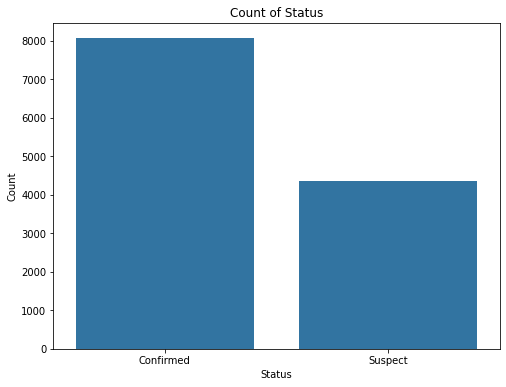

In [19]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_cleaned, x='Status')
plt.title('Count of Status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

In [45]:
df_cleaned[['Status']].describe()

,Status
count,16845
unique,2
top,Confirmed
freq,12494


In [20]:
df_cleaned['Status'] = df_cleaned['Status'].fillna('Confirmed', inplace = False)

In [21]:
df_cleaned['Status'].isnull().sum()

0

## <blockquote> Location </blockquote>


In [22]:
df_cleaned['Location'].isnull().sum()

1461

In [23]:
df_cleaned['Location'].unique()

array(['Restaurant', nan, 'Private Home/Residence', 'Grocery Store',
       'Catering Service', 'Restaurant; Catering Service',
       'School/College/University', 'Restaurant; Grocery Store',
       'Restaurant; Private Home/Residence',
       'Nursing Home/Assisted Living Facility', 'Hospital',
       'Office/Indoor Workplace', 'Prison/Jail', 'Child Daycare',
       'Religious Facility', 'Camp',
       'Private Home/Residence; Religious Facility',
       'Private Home/Residence; Catering Service', 'Unknown',
       'Fair/Festival', 'Private Home/Residence; Grocery Store',
       'Catering Service; School/College/University',
       'School/College/University; Religious Facility',
       'School/College/University; Camp',
       'Grocery Store; Office/Indoor Workplace',
       'Restaurant; Private Home/Residence; Grocery Store',
       'Private Home/Residence; Fair/Festival', 'Restaurant; Prison/Jail',
       'Restaurant; Nursing Home/Assisted Living Facility',
       'Restaurant; Sch

---
## <blockquote> Hospitalizations </blockquote>
### עמודה מספרית


In [24]:
df_cleaned['Hospitalizations'].isnull().sum()

1766

In [25]:
df_cleaned['Hospitalizations'].unique()

array([  0.,   3.,  nan,   2.,   1.,   5.,   6.,   4.,  60.,   7.,  47.,
        10.,  12.,  14.,  24.,  11.,  17.,  35.,  31.,   9., 101.,  13.,
        16.,   8.,  15.,  23.,  29.,  30.,  19.,  18.,  34.,  22.,  58.,
        36.,  43.,  20.,  25., 129.,  56.,  39.,  21., 103.,  55.,  27.,
       108., 308.,  32.,  71., 166.,  52.,  28.,  50., 143.,  33.,  94.,
        40.,  70., 200.,  48., 204.,  49.])

In [26]:
df_cleaned['Hospitalizations'].nunique()

60

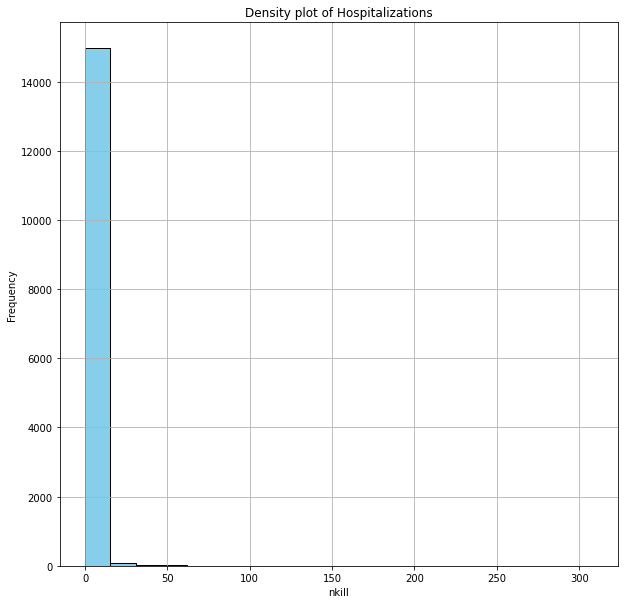

In [27]:
plt.figure(figsize=(10, 10))
plt.hist(df_cleaned['Hospitalizations'], bins=20, color='skyblue', edgecolor='black')
plt.title('Density plot of Hospitalizations')
plt.xlabel('nkill')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [28]:
df_cleaned[['Hospitalizations']].describe()

,Hospitalizations
count,15079.000000
mean,0.957159
std,5.369725
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,308.000000


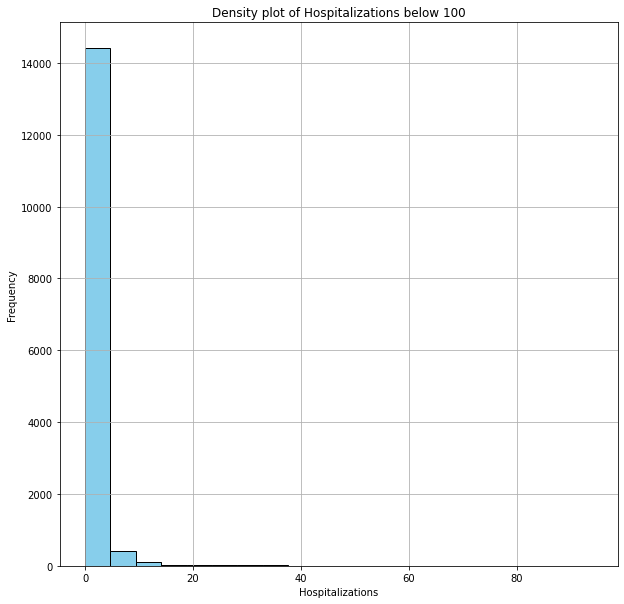

In [29]:
filtered_hospitalizations = df_cleaned['Hospitalizations'][df_cleaned['Hospitalizations'] < 100]
plt.figure(figsize=(10, 10))
plt.hist(filtered_hospitalizations, bins=20, color='skyblue', edgecolor='black')
plt.title('Density plot of Hospitalizations below 100')
plt.xlabel('Hospitalizations')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

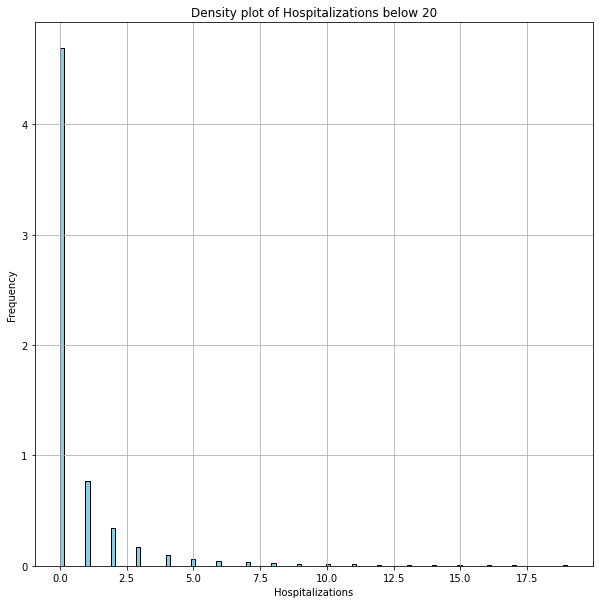

In [30]:
filtered_hospitalizations = df_cleaned['Hospitalizations'][df_cleaned['Hospitalizations'] < 20]
plt.figure(figsize=(10, 10))
plt.hist(filtered_hospitalizations, bins=120, color='skyblue', edgecolor='black', density= True)
plt.title('Density plot of Hospitalizations below 20')
plt.xlabel('Hospitalizations')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [31]:
filtered_hospitalizations.describe()

count    14993.000000
mean         0.685653
std          1.822783
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         19.000000
Name: Hospitalizations, dtype: float64

In [32]:
len(filtered_hospitalizations)

14993

In [38]:
((filtered_hospitalizations == 0).sum() / filtered_hospitalizations.size) * 100

74.28133128793436

In [39]:
df_cleaned['Hospitalizations'] = df_cleaned['Hospitalizations'].fillna(0, inplace = False)

# **--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## Noisy data - outliers

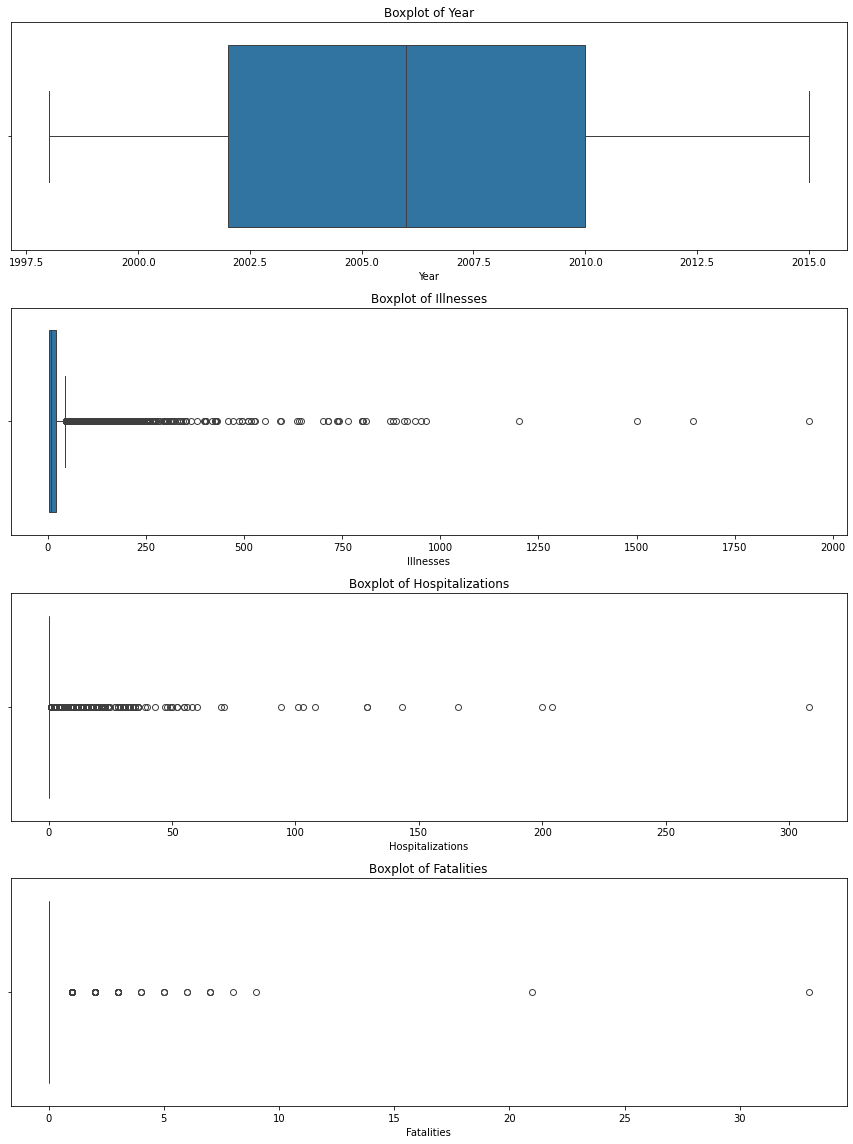

In [40]:
def plot_boxplot_matrix(df, numeric_columns):
    num_cols = len(numeric_columns)
    fig, axes = plt.subplots(nrows=num_cols, ncols=1, figsize=(12, num_cols * 4))
    if num_cols == 1:
        axes = [axes]
    for ax, column in zip(axes, numeric_columns):
        sns.boxplot(x=df[column], ax=ax)
        ax.set_title(f'Boxplot of {column}')
    
    plt.tight_layout()
    plt.show()

numeric_columns = ['Year','Illnesses','Hospitalizations','Fatalities']
plot_boxplot_matrix(df_cleaned, numeric_columns)


In [46]:
df_cleaned[df_cleaned['Hospitalizations']>60]

,Year,Month,State,Location,Food,Species,Status,Illnesses,Hospitalizations,Fatalities
1062,1998,October,Multistate,NaN,"Hot Dog, Unspecified",Listeria monocytogenes,Confirmed,101,101.0,21.0
8492,2004,July,Multistate,Restaurant,Roma Tomato,Salmonella enterica; Salmonella enterica; Salm...,Confirmed,429,129.0,0.0
10775,2006,August,Multistate,Private Home/Residence,Spinach,"Escherichia coli, Shiga toxin-producing",Confirmed,238,103.0,5.0
10776,2006,August,Multistate,NaN,Peanut Butter,Salmonella enterica,Confirmed,715,129.0,0.0
11432,2007,February,Multistate,Private Home/Residence,Pot Pie,Salmonella enterica,Confirmed,401,108.0,3.0
12678,2008,April,Multistate,NaN,"Peppers, Jalapeno; Tomato, Unspecified; Pepper...",Salmonella enterica,Confirmed,1500,308.0,2.0
13054,2008,August,Oklahoma,Restaurant; Religious Facility,NaN,"Escherichia coli, Shiga toxin-producing",Confirmed,344,71.0,1.0
13108,2008,September,Multistate,NaN,Peanut Butter; Peanut Paste,Salmonella enterica,Confirmed,714,166.0,9.0
15329,2011,July,Multistate,Private Home/Residence,Cantaloupe,Listeria monocytogenes,Confirmed,147,143.0,33.0
16158,2012,July,Multistate,Private Home/Residence,Cantaloupe,Salmonella enterica; Salmonella enterica,Confirmed,261,94.0,3.0
